In [1]:
# importing all the packages and naming them as per our convinience.
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from scipy.stats import probplot
import warnings
warnings.filterwarnings('ignore')

In [2]:
"""Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python."""
"""1) Delivery_time -> Predict delivery time using sorting time """

'1) Delivery_time -> Predict delivery time using sorting time '

In [3]:
# importing the data using pandas.
data=pd.read_csv('E:\SLR/delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
...,...,...
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7


In [6]:
#create log-transformed data
data_log = np.log(data)

#create squareroot-transformed data
data_sqrt = np.sqrt(data)

#create cuberoot-transformed data
data_cbrt = np.cbrt(data)

In [7]:
# creating a dataframe using pandas.
df=pd.DataFrame(data)
df_log=pd.DataFrame(data_log)
df_sqrt=pd.DataFrame(data_sqrt)
df_cbrt=pd.DataFrame(data_cbrt)

In [5]:
# Now, After creating the dataframe the main step is to explore throughout the data.
# this exploration of data is considered as one of the main steps in the data analysis.
# in univaiate data we have done hypothesis testing types to get the desired output.
# now the data which we got is bivariate data with two varaibles , so we have to perform EDA on the data and check the relationship between them

In [6]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot: xlabel='Delivery Time', ylabel='Density'>

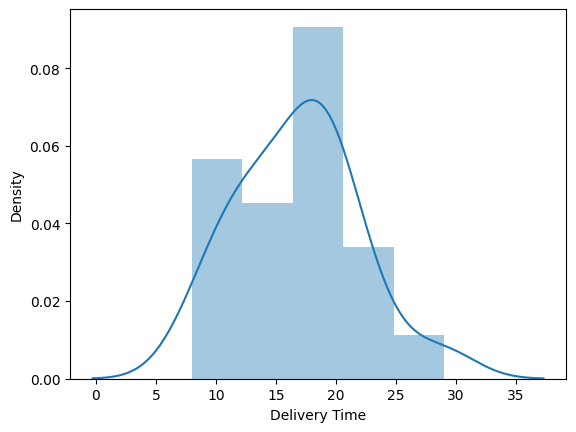

In [7]:
# we have previously used distplot to see that our data is folowing normal distribution or not
sns.distplot(df['Delivery Time'])

<AxesSubplot: xlabel='Sorting Time', ylabel='Density'>

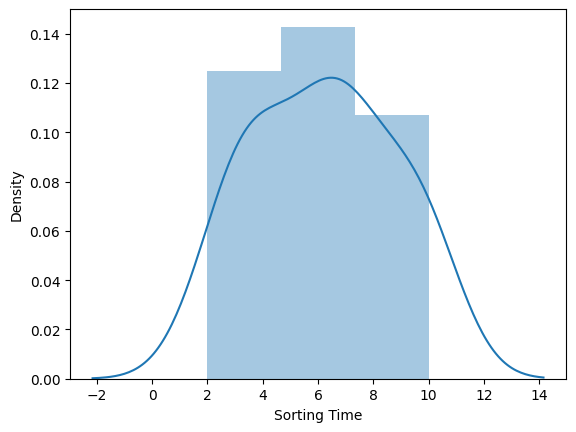

In [8]:
sns.distplot(df['Sorting Time'])

(array([[<AxesSubplot: title={'center': 'Delivery Time'}>,
         <AxesSubplot: title={'center': 'Sorting Time'}>]], dtype=object),
 array([[<AxesSubplot: title={'center': 'Delivery Time'}>,
         <AxesSubplot: title={'center': 'Sorting Time'}>]], dtype=object),
 array([[<AxesSubplot: title={'center': 'Delivery Time'}>,
         <AxesSubplot: title={'center': 'Sorting Time'}>]], dtype=object),
 array([[<AxesSubplot: title={'center': 'Delivery Time'}>,
         <AxesSubplot: title={'center': 'Sorting Time'}>]], dtype=object))

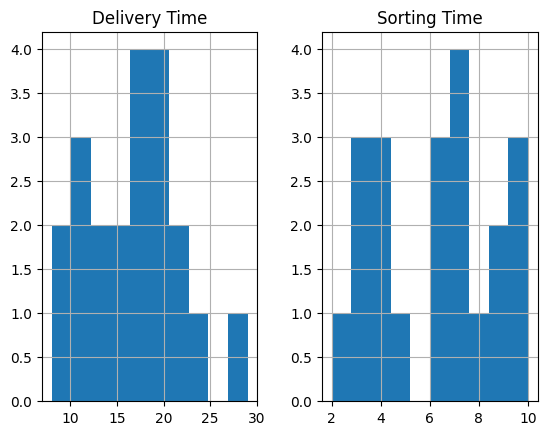

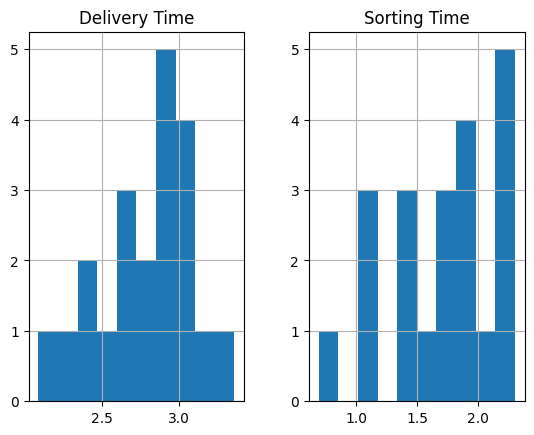

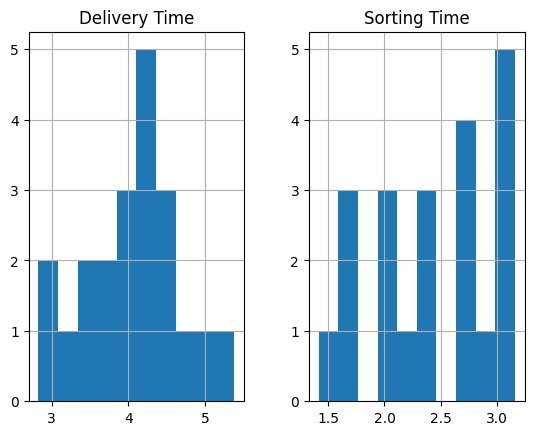

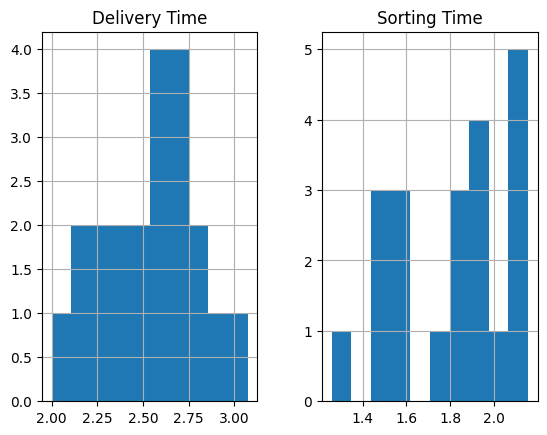

In [8]:
# histogram to check the distribution of data

# histogram to check the distribution of data
df.hist() , df_log.hist() , df_sqrt.hist() , df_cbrt.hist()

# we can see that the data is normally distributed and symmetrical with bell shape

<AxesSubplot: >

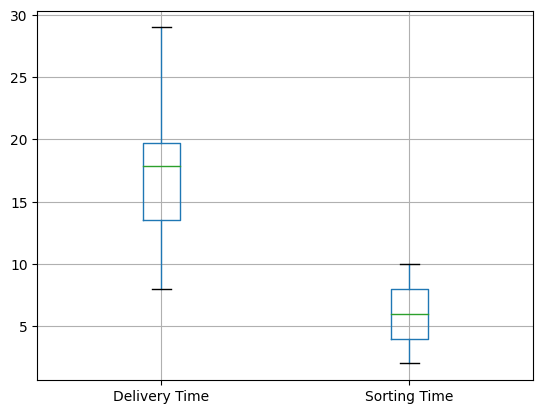

In [10]:
# boxplot will find out the outliers present in the data

df.boxplot()

# we can see  that there are no outliers in the data so we can continue the next eda process

Text(0.5, 1.0, "Q-Q plot of 'Delivery Time'")

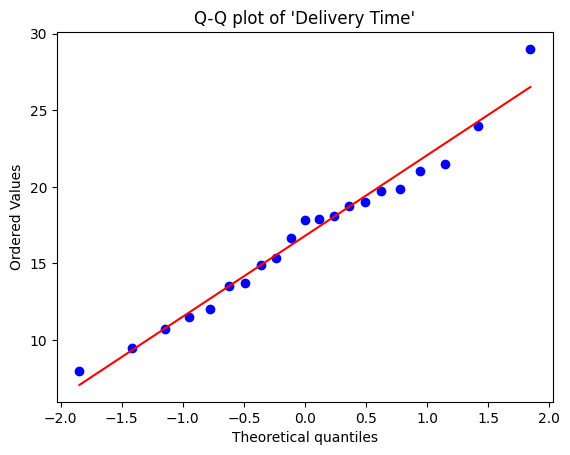

In [15]:
# Q-Q plot of Delivery Time
probplot(df['Delivery Time'], plot=plt)
plt.title("Q-Q plot of 'Delivery Time'")


Text(0.5, 1.0, "Q-Q plot of 'Sorting Time'")

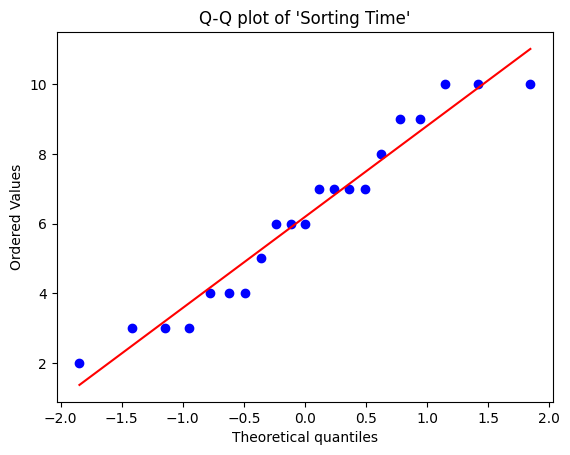

In [16]:
# Q-Q plot of Sorting Time
probplot(df['Sorting Time'], plot=plt)
plt.title("Q-Q plot of 'Sorting Time'")

In [17]:
# now we have to check the relation between the two variables

df.corr()

# we can see that there is a strong positive realtionship between Delivery Time and Sorting Time

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot: xlabel='Sorting Time', ylabel='Delivery Time'>

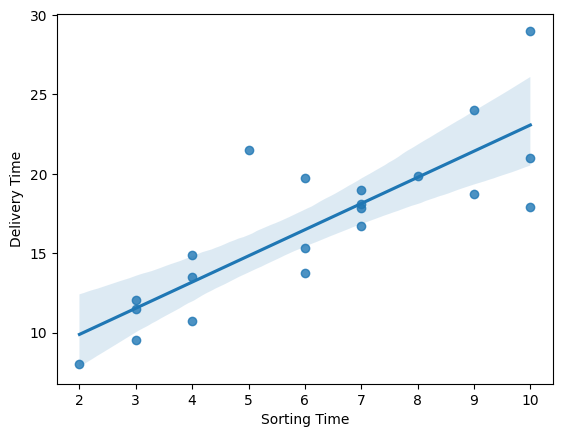

In [18]:
# plotting a regression plot to see where the actual data points lie on the plot
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])

In [9]:
# now let us denote what is our null hypothesis
Ho = 'Data is Normal'

# now let us denote what is our alternative hypothesis
Ha = 'Data is not Normal'


# Defining a shapiro test function with 5% significance value
alpha = 0.05
def normality_check(df):
    for columnName, columnData in df.iteritems():
        print("Shapiro test for {columnName}".format(columnName=columnName))
        res = stats.shapiro(columnData)
#         print(res)
        pValue = round(res[1], 2)
        
        if pValue > alpha:
            print("pvalue = {pValue} > {alpha}. We fail to reject Null Hypothesis. {Ho}".format(pValue=pValue, alpha=alpha, Ho=Ho))
        else:
            print("pvalue = {pValue} <= {alpha}. We reject Null Hypothesis. {Ha}".format(pValue=pValue, alpha=alpha, Ha=Ha))
        
normality_check(df)

# as the data is normal we dont need to do any transformation on the data so we can contineue with the  model fitting

Shapiro test for Delivery Time
pvalue = 0.9 > 0.05. We fail to reject Null Hypothesis. Data is Normal
Shapiro test for Sorting Time
pvalue = 0.19 > 0.05. We fail to reject Null Hypothesis. Data is Normal


In [10]:
# Renaming Columns to apply the simple linear regression model
new_df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
new_df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
...,...,...
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7


In [11]:
# for applyting the simple linear regression model we got many methods
# but here iam going to work this one out with two of my most favourite methods
"""1.Linear Regression using sklearn.linear_model and another is using ORDINARY LEAST SQUARE METHOD both taught by advaith sir in the Excelr Class"""


'1.Linear Regression using sklearn.linear_model and another is using ORDINARY LEAST SQUARE METHOD both taught by advaith sir in the Excelr Class'

In [12]:
x=new_df["sorting_time"]
y=new_df["delivery_time"]

In [13]:
import numpy as np

a=np.array(x)
b=np.array(y)

c=np.c_[a]
c

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [14]:
#fitting the Linear Regression using sklearn.linear_model
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(c,b)
print("intercept =",Lr.intercept_)
print("coefficient",Lr.coef_)

b_pred=Lr.predict(c)

error = y-b_pred
print("error rate",error.sum())

intercept = 6.58273397199706
coefficient [1.6490199]
error rate -5.684341886080802e-14


In [15]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y,b_pred)
print("mean square error is = ",mse)
print("root mean square error is = ",np.sqrt(mse))

mean square error is =  7.793311548584063
root mean square error is =  2.7916503270617654


In [16]:
# giving data for Prediction let it be sorting time 9,12
new_data=pd.Series([9,12])
new_data

0     9
1    12
dtype: int64

In [17]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,9
1,12


In [18]:
Lr.predict(data_pred)

array([21.42391304, 26.37097273])

In [19]:
# Manual prediction for say sorting time 9 and 12 to check whether our prediction is right or wrong
delivery_time9 = (6.582734) + (1.649020)*(9)
print(delivery_time9)
delivery_time12 = (6.582734) + (1.649020)*(12)
print(delivery_time12)

21.423914
26.370973999999997


In [20]:
# now going with the second method that i have learned using the ordinary least square method

In [21]:
model=smf.ols("delivery_time~sorting_time",data=new_df).fit()

In [35]:
# Coefficient parameters i.e intercept and slope
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [36]:
# tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [52]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [27]:

df_log=df_log.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df_sqrt=df_sqrt.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df_cbrt=df_cbrt.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

In [28]:
# fitting the regression model using ordinary least square method
model_log=smf.ols("delivery_time~sorting_time",data=df_log).fit()
model_sqrt=smf.ols("delivery_time~sorting_time",data=df_sqrt).fit()
model_cbrt=smf.ols("delivery_time~sorting_time",data=df_cbrt).fit()

In [29]:
# Coefficient parameters i.e intercept and slope
print(model_log.params)
print(model_sqrt.params)
print(model_cbrt.params)

Intercept       1.741987
sorting_time    0.597522
dtype: float64
Intercept       1.613479
sorting_time    1.002217
dtype: float64
Intercept       1.013571
sorting_time    0.845585
dtype: float64


In [30]:
# Pvalues and tvalues
print(model_log.tvalues, model_log.pvalues)
print(model_sqrt.tvalues, model_sqrt.pvalues)
print(model_cbrt.tvalues, model_cbrt.pvalues)

Intercept       13.085552
sorting_time     8.024484
dtype: float64 Intercept       5.921137e-11
sorting_time    1.601539e-07
dtype: float64
Intercept       4.628248
sorting_time    7.152817
dtype: float64 Intercept       1.833621e-04
sorting_time    8.475706e-07
dtype: float64
Intercept       4.900067
sorting_time    7.433210
dtype: float64 Intercept       9.941770e-05
sorting_time    4.904127e-07
dtype: float64


In [31]:
# Rsquared and Rsquared adjusted values

print(model_log.rsquared , model_log.rsquared_adj)
print(model_sqrt.rsquared , model_sqrt.rsquared_adj)
print(model_cbrt.rsquared , model_cbrt.rsquared_adj)

# therefore the model score is 95.69% which is considered as excellent in the model predition

0.77216134926874 0.7601698413355158
0.7292011987544665 0.7149486302678596
0.7441167577566272 0.7306492186911866


In [32]:
print(model_log.summary())
print(model_sqrt.summary())
print(model_cbrt.summary())

                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.60e-07
Time:                        12:37:32   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7420      0.133     13.086   

In [33]:
#make a table containing R^2-adj value for each prepared model.
r2={'Prep_Models':['Model',"model_log","model_sqrt","model_cbrt"],'Rsquared':[model.rsquared,model_log.rsquared,model_sqrt.rsquared,model_cbrt.rsquared]}
table=pd.DataFrame(r2)
table

# the model with Log transformations has the best accuracy scores.
# 77% is considered as one of the best accuracy score to this dataset by simple linear regression model

,Prep_Models,Rsquared
0,Model,0.682271
1,model_log,0.772161
2,model_sqrt,0.729201
3,model_cbrt,0.744117


In [34]:
#make a table containing R^2-adj value for each prepared model.
r2_adj={'Prep_Models':['Model',"model_log","model_sqrt","model_cbrt"],'Rsquared_adj':[model.rsquared_adj,model_log.rsquared_adj,model_sqrt.rsquared_adj,model_cbrt.rsquared_adj]}
table=pd.DataFrame(r2_adj)
table

# the model with Log transformations has the best accuracy scores.
# 77% is considered as one of the best accuracy score to this dataset by simple linear regression model

,Prep_Models,Rsquared_adj
0,Model,0.665549
1,model_log,0.760170
2,model_sqrt,0.714949
3,model_cbrt,0.730649


In [35]:
# i think in the case of bivariate variables its better to go with transformations first instead of going with cooks distance
# removing highly infuencing outliers didn't help in this case though

In [45]:
# we can see that there are errors in the x-variables while predicting y-variables
# now in order to remove this errors/outliers we are going to use cook's distance method
# According to cook'd distanec method If Cook's distance > 1, then it's an outlier
(c,_)=model.get_influence().cooks_distance
c

array([5.65174628e-02, 6.05802657e-04, 3.28610455e-02, 5.27064095e-02,
       4.62053041e-01, 3.89480081e-03, 2.60419093e-03, 3.96028930e-02,
       3.51953954e-01, 5.67854347e-02, 1.49639848e-05, 3.46421730e-02,
       7.12499306e-03, 8.53239427e-06, 2.40503559e-03, 1.69949775e-02,
       2.28073073e-02, 8.58728156e-07, 5.65138719e-02, 2.98356431e-04,
       1.70820972e-01])

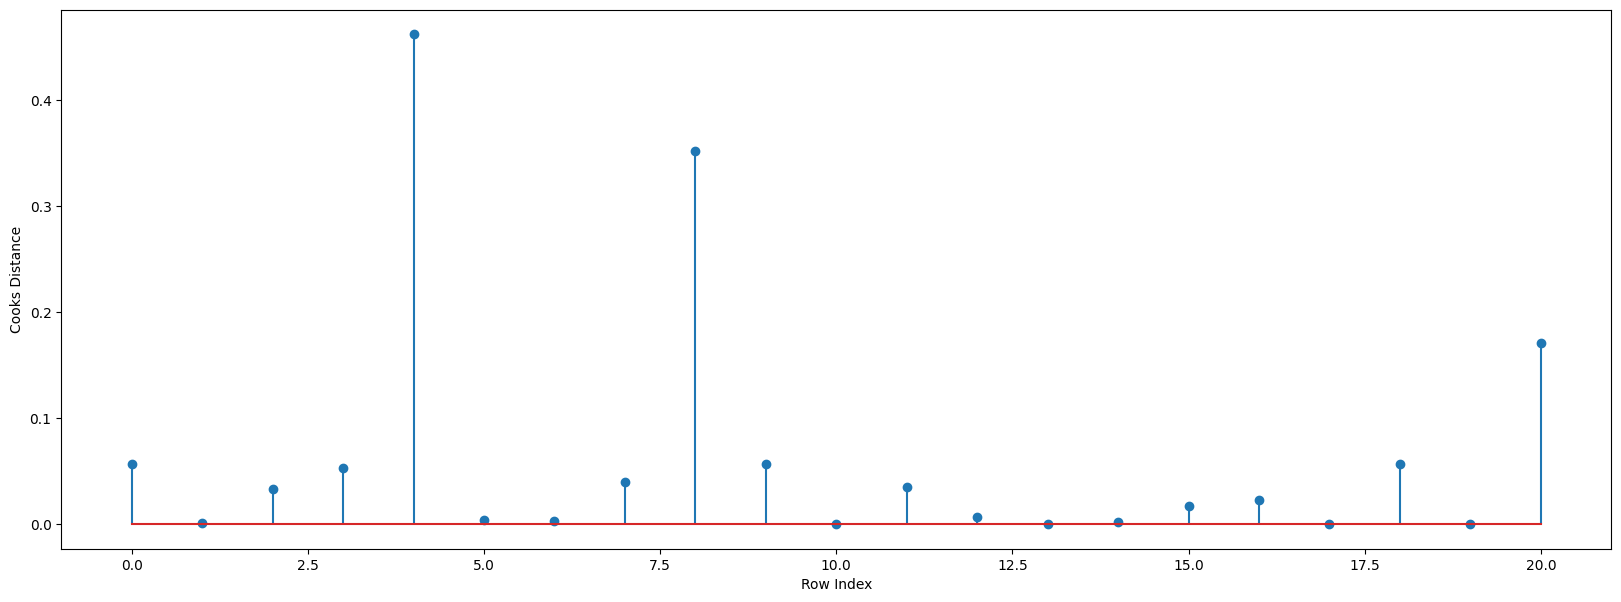

In [46]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(new_df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [54]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(4, 0.462053041265031)

In [57]:
if np.max(c)>0.2:
    model=smf.ols("delivery_time~sorting_time",data=new_df).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    new_df=new_df.drop(new_df.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    new_df 
elif np.max(c)<0.5:
    final_model=smf.ols("delivery_time~sorting_time",data=new_df).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

In [51]:
# rule of thumb leverage cutoff value more than 3p/n and less than 2p/n
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=new_df.shape[1]
n=new_df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.42857142857142855

In [38]:
# giving data for Prediction let it be sorting time 9,12
new_data=pd.Series([9,12])
new_data

0     9
1    12
dtype: int64

In [39]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,9
1,12


In [40]:
model.predict(data_pred)

0    21.423913
1    26.370973
dtype: float64

In [41]:
# Manual prediction for say sorting time 9 and 12 to check whether our prediction is right or wrong
delivery_time9 = (6.582734) + (1.649020)*(9)
print(delivery_time9)
delivery_time12 = (6.582734) + (1.649020)*(12)
print(delivery_time12)

21.423914
26.370973999999997


In [42]:
# actually we can get a whole summary of parameters using the ols method
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 22 May 2023   Prob (F-statistic):           3.98e-06
Time:                        09:25:48   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""